In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd

consumer_key="BizW5ryIDWkjAv2TVgRHL9yFH"
consumer_secret="2u15AAM7YgGRDQmFH30y7NpxMJwriOyZFRD3gmhE7yBr9sTHKh"
access_token="1448928724800344071-BjFMhEGkRPrHIigKGpmWHaDVxtk32H"
access_secret="ruBQNk91olJeJiavkpYH5uTkqufF4zHr2S12lTDThalLK"

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
keyword = ['kominfo']

text,created_at,user_name,id = [],[],[],[]
for kw in keyword :
  for tweet in tweepy.Cursor(api.search, q=['kominfo'], rpp=300, count=300, date_since="2022-01-01", include_entities=True, lang="id").items(3000):
      text.append(tweet.text)
      created_at.append(tweet.created_at)
      user_name.append(tweet.user.name)
      id.append(tweet.user.id)
    
list_ = {'text': text, 
         'Created At' : created_at,
         'Username' : user_name,
         'id' : id}

df = pd.DataFrame(list_)
df.to_csv("kominfo.csv")
df

,text,Created At,Username,id
0,"@tanyakanrl Buat warga twitter semuanya, kalo ...",2022-07-19 16:09:35,aprill,1313289073528729600
1,RT @1998ur_: Kalo twitter jadi diblock sama ko...,2022-07-19 16:09:33,forverotonad,1485509609268064258
2,RT @ezash: H-1 sebelum kominfo (katanya) block...,2022-07-19 16:09:31,xhra୧⍤⃝🦧,974552299199606785
3,RT @tbzdayz: gmn ya cara gue sebarin ke semua ...,2022-07-19 16:09:30,de,1158702229664124928
4,RT @1998ur_: Kalo twitter jadi diblock sama ko...,2022-07-19 16:09:29,Ze,1148933490756313088
...,...,...,...,...
2995,RT @spaghettoniii: pov warga indonesia pas kom...,2022-07-19 15:23:43,KeitoKeito,1209763681719816192
2996,RT @Relyourbae2: Kalo Twitter beneran diblokir...,2022-07-19 15:23:43,loay,1169260321401212928
2997,RT @ezash: H-1 sebelum kominfo (katanya) block...,2022-07-19 15:23:42,Eka Novia Sari,192206072
2998,RT @Relyourbae2: Kalo Twitter beneran diblokir...,2022-07-19 15:23:42,Y,1086979582333337600


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install varname
!pip install keras-metrics
!pip install h5py
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.3 MB/s 


In [3]:
import tweepy
from tweepy import OAuthHandler
import nltk
import pandas as pd
import re
import tensorflow as tf
import time
import multiprocessing
import io
import gensim
import numpy as np
import matplotlib.pyplot as plt
import keras_metrics as km
import pickle
import keras
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from tensorflow import keras
import textblob           
from textblob import TextBlob
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Activation, Embedding, LSTM, Bidirectional, Dropout,GRU
from keras import regularizers
from keras.models import load_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from nltk.tokenize import TweetTokenizer
from collections import defaultdict
from datetime import timedelta
from gensim.models import word2vec
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from varname import nameof
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import pandas as pd #untuk membaca data
import numpy as np #untuk kebutuhan dalam menganalisis data seperti operasi vektor dan matriks
import csv



data = pd.read_csv("/content/drive/MyDrive/Tugas akhir TA/sofanjih2.csv")

data

,text,label,id
0,RT @feiitoteles @pinguin________ Lu yang tolol...,positif,9.310000e+07
1,"RT @idextratime Tolol emang lu viet sama thai,...",positif,2.786674e+09
2,"RT ,Aduh si tolol emang. Kesel banget https://...",positif,7.450000e+08
3,RT @Hayat_aL_Fatih @detikcom Terus bestie boco...,negatif,1.450000e+18
4,"RT ""Dasar tolol nyakitin mulu lo bangsat, gagu...",positif,7.660000e+17
...,...,...,...
1124,"130,""@graham_asscot Nahhhh ... E mail kita pun...",positif,1.050000e+18
1125,"132,RT @akidoverseas: Gw gak takut sama blokir...",negatif,1.500000e+18
1126,"144,""RT @kittenjihan: @akiheyyyyyyy @convomf K...",positif,1.290000e+18
1127,"145,""RT @BayKnight03: @resir014 @nden """"ketika...",positif,4.060000e+09


In [5]:
data.drop_duplicates(subset='text',keep=False, inplace=True)

data

,text,label,id
0,RT @feiitoteles @pinguin________ Lu yang tolol...,positif,9.310000e+07
1,"RT @idextratime Tolol emang lu viet sama thai,...",positif,2.786674e+09
2,"RT ,Aduh si tolol emang. Kesel banget https://...",positif,7.450000e+08
3,RT @Hayat_aL_Fatih @detikcom Terus bestie boco...,negatif,1.450000e+18
4,"RT ""Dasar tolol nyakitin mulu lo bangsat, gagu...",positif,7.660000e+17
...,...,...,...
1124,"130,""@graham_asscot Nahhhh ... E mail kita pun...",positif,1.050000e+18
1125,"132,RT @akidoverseas: Gw gak takut sama blokir...",negatif,1.500000e+18
1126,"144,""RT @kittenjihan: @akiheyyyyyyy @convomf K...",positif,1.290000e+18
1127,"145,""RT @BayKnight03: @resir014 @nden """"ketika...",positif,4.060000e+09


CASEFOLDING

In [6]:
#mengubah seluruh huruf menjadi huruf keci
data['text'] = data['text'].str.lower()

print('Hasil CaseFolding :\n')
print(data['text'])
print('\n\n\n')

Hasil CaseFolding :

0       rt @feiitoteles @pinguin________ lu yang tolol...
1       rt @idextratime tolol emang lu viet sama thai,...
2       rt ,aduh si tolol emang. kesel banget https://...
3       rt @hayat_al_fatih @detikcom terus bestie boco...
4       rt "dasar tolol nyakitin mulu lo bangsat, gagu...
                              ...                        
1124    130,"@graham_asscot nahhhh ... e mail kita pun...
1125    132,rt @akidoverseas: gw gak takut sama blokir...
1126    144,"rt @kittenjihan: @akiheyyyyyyy @convomf k...
1127    145,"rt @bayknight03: @resir014 @nden ""ketika...
1128    153,"hi kominfo, tolong sekalian blokir kemisk...
Name: text, Length: 1129, dtype: object






FILTERING

In [7]:
from nltk.text import Text
import string #digunakan untuk menangani string ataupun substring
import nltk #untuk memproses teks seperti melakukan classification, tokenization, stemming dll
import re #urutan karakter yang membentuk pola pencarian

#hapus teks khusus
def remove_text_special(text):
  text = text.replace('\\t', " ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  text = text.encode('ascii','replace').decode('ascii')
  text = ' '.join(re.sub("[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",text).split())

  return text.replace("http://"," ").replace("https://"," ")

  data['text'] = data['text'].apply(remove_text_special)
#hapus nomor
def remove_number(text):
 return re.sub(r"\d+", "", text)
data['text'] = data['text'].apply(remove_number)

#hilangkan tanda baca
def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

data['text'] = data['text'].apply(remove_punctuation)

#hapus spasi
def remove_whitespace_LT(text):
  return text.strip()

data['text'] = data['text'].apply(remove_whitespace_LT)

#hapus beberapa spasi putih menjadi spasi tunggal
def remove_whitespace_multiple(text):
  return re.sub('\s+',' ', text)

data['text'] = data['text'].apply(remove_whitespace_multiple)

#menghapus char
def remove_singl_char(text):
  return re.sub(r"\b[a-zA-Z]\b","", text)

data['text'] = data['text'].apply(remove_singl_char)


TOKENIZING

In [8]:
#tahap pemotongan string masukan berdasarkan kata- kata yang menyusunnya atau dengan kata lain pemecahan kalimat menjadi kata

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download("punkt")

#pembungkus tokenize kata
def word_tokenize_wrapper(text):
  return word_tokenize (text)
data['text_tokens'] = data['text'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing :\n')
print(data['text_tokens'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing :

0    [rt, feiitoteles, pinguin, lu, yang, tolol, ðÿ...
1    [rt, idextratime, tolol, emang, lu, viet, sama...
2    [rt, aduh, si, tolol, emang, kesel, banget, ht...
3    [rt, hayatalfatih, detikcom, terus, bestie, bo...
4    [rt, dasar, tolol, nyakitin, mulu, lo, bangsat...
Name: text_tokens, dtype: object






In [9]:
def freqDist_wrapper(text): #menghitung kemunculan kata dalam satu kalimat
  return FreqDist(text)

data['text_tokens_fdist'] = data['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(data['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(rt, 1), (feiitoteles, 1), (pinguin, 1), (lu,...
1    [(rt, 1), (idextratime, 1), (tolol, 1), (emang...
2    [(rt, 1), (aduh, 1), (si, 1), (tolol, 1), (ema...
3    [(rt, 1), (hayatalfatih, 1), (detikcom, 1), (t...
4    [(rt, 1), (dasar, 1), (tolol, 1), (nyakitin, 1...
Name: text_tokens_fdist, dtype: object


STOPWORD

In [10]:
from nltk.corpus import stopwords
nltk.download("stopwords")

list_stopwords = stopwords.words('indonesian')


list_stopwords.extend(["yg","dg","rt","dgn","ny","klo","lu","tdk",
                      'utk','kalo','smpe','biar','bkin','blang','gak',
                      'ga','krn','nya','nih','sih','si','tau',
                      'tuh','ya','jd','jgn','jg','aja','n','t','kr',
                      'nyg','hehe','wkwk','loh','elu','rt','amp','&amp','yah'])

#konversi daftar ke kamus
list_stopwords = set(list_stopwords)

#hapus stopword pada token list
def stopwords_removal(words):
	return [word for word in words if word not in list_stopwords]

data['text_tokens_WSW'] = data['text_tokens'].apply(stopwords_removal)

print(data['text_tokens_WSW'].head())

0     [feiitoteles, pinguin, tolol, ðÿ™†ðÿ¿â€â™‚ï¸]
1    [idextratime, tolol, emang, viet, thai, jiahel...
2    [aduh, tolol, emang, kesel, banget, httpstcogh...
3    [hayatalfatih, detikcom, bestie, bocor, curhat...
4    [dasar, tolol, nyakitin, mulu, lo, bangsat, ga...
Name: text_tokens_WSW, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
!pip3 install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 825 kB 7.9 MB/s 
     |████████████████████████████████| 281 kB 74.1 MB/s 
     |████████████████████████████████| 140 kB 75.2 MB/s 
  Created wheel for swifter: filename=swifter-1.3.2-py3-none-any.whl size=16199 sha256=fdf63713d2d0aabc72767c99d63d0761f6c21ecde93634af2c439f618eb5e716
  Stored in directory: /root/.cache/pip/wheels/ed/9f/74/64543a9fcef6095b5e9428e21674fd208c8ce372a58ffbc818
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [16]:
data.head()

,text,label,id,text_tokens,text_tokens_fdist,text_tokens_WSW
0,rt feiitoteles pinguin lu yang tolol ðÿ™†ðÿ¿â...,positif,9.310000e+07,"[rt, feiitoteles, pinguin, lu, yang, tolol, ðÿ...","{'rt': 1, 'feiitoteles': 1, 'pinguin': 1, 'lu'...","[feiitoteles, pinguin, tolol, ðÿ™†ðÿ¿â€â™‚ï¸]"
1,rt idextratime tolol emang lu viet sama thai j...,positif,2.786674e+09,"[rt, idextratime, tolol, emang, lu, viet, sama...","{'rt': 1, 'idextratime': 1, 'tolol': 1, 'emang...","[idextratime, tolol, emang, viet, thai, jiahel..."
2,rt aduh si tolol emang kesel banget httpstcogh...,positif,7.450000e+08,"[rt, aduh, si, tolol, emang, kesel, banget, ht...","{'rt': 1, 'aduh': 1, 'si': 1, 'tolol': 1, 'ema...","[aduh, tolol, emang, kesel, banget, httpstcogh..."
3,rt hayatalfatih detikcom terus bestie bocor ka...,negatif,1.450000e+18,"[rt, hayatalfatih, detikcom, terus, bestie, bo...","{'rt': 1, 'hayatalfatih': 1, 'detikcom': 1, 't...","[hayatalfatih, detikcom, bestie, bocor, curhat..."
4,rt dasar tolol nyakitin mulu lo bangsat gaguna...,positif,7.660000e+17,"[rt, dasar, tolol, nyakitin, mulu, lo, bangsat...","{'rt': 1, 'dasar': 1, 'tolol': 1, 'nyakitin': ...","[dasar, tolol, nyakitin, mulu, lo, bangsat, ga..."


In [17]:
!pip3 install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


STEMMING

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

#Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemming
def stemmed_wrapper(term):
	return stemmer.stem(term)

term_dict = {}

for document in data['text_tokens_WSW']:
  for term in document :
    if term not in term_dict:
      term_dict[term] = ' '
print(len(term_dict))
print("-------------------")

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)
  print(term, ":" ,term_dict[term])

print(term_dict)
print("-------------------")

#terapkan istilah stemming ke dataframe
def get_stemmed_term(document):
	return [term_dict[term] for term in document]

data['text_tokens_stemmed'] = data['text_tokens_WSW'].swifter.apply(get_stemmed_term)
print(data['text_tokens_stemmed'])

Output streaming akan dipotong hingga 5000 baris terakhir.
mengendus : endus
piara : piara
jauhâ€¦ : jauh
httpstcogeoxuckr : httpstcogeoxuckr
raden : raden
antasenaðÿ‡®ðÿ‡©ðÿ‡®ðÿ‡©ðÿ‡®ðÿ‡© : antasena
gila : gila
dibuka : buka
bersih : bersih
jing : jing
periksaâ€¦ : periksa
httpstcocpmxurxch : httpstcocpmxurxch
protagonist : protagonist
jaryoko : jaryoko
bpkri : bpkri
dki : dki
terbuang : buang
siaâ² : sia
juve : juve
diehard : diehard
adi : adi
ferrynlangelo : ferrynlangelo
pelacak : lacak
gercep : gercep
ngga : ngga
mengâ€¦ : meng
httpstcozitwvib : httpstcozitwvib
leonitalestari : leonitalestari
lbh : lbh
memelihara : pelihara
biaya : biaya
perawatan : awat
murah : murah
ðÿ‡®ðÿ‡©choðÿ‡®ðÿ‡© : cho
ngusut : ngusut
dkijakarta : dkijakarta
kelar : kelar
httpstcotpjhoktdpj : httpstcotpjhoktdpj
download : download
aplikasiâ€¦ : aplikasi
httpstcoctooksgu : httpstcoctooksgu
srilangka : srilangka
pemimpin : pimpin
ugalugalan : ugalugalan
membangun : bangun
dibiayai : biaya
china : china
kampu

Pandas Apply:   0%|          | 0/1129 [00:00<?, ?it/s]

0                         [feiitoteles, pinguin, tolol, ]
1       [idextratime, tolol, emang, viet, thai, jiahel...
2       [aduh, tolol, emang, kesel, banget, httpstcogh...
3       [hayatalfatih, detikcom, bestie, bocor, curhat...
4       [dasar, tolol, nyakitin, mulu, lo, bangsat, ga...
                              ...                        
1124    [grahamasscot, nahhhh, mail, gmail gendenk, pe...
1125    [akidoverseas, gw, takut, blokir, kominfo, gw,...
1126    [kittenjihan, akiheyyyyyyy, convomf, ken, jadi...
1127    [bayknight, resir, nden, gabisa, ngasi, solusi...
1128        [hi, kominfo, tolong, blokir, miskin, cimeng]
Name: text_tokens_stemmed, Length: 1129, dtype: object


In [19]:
data.to_csv("hasil preprop.csv")

TF IDF

In [20]:
from sklearn.feature_extraction.text  import CountVectorizer, TfidfTransformer
#library untuk menghitung menjadi representasi tf atau tf-idf yang dinormalisasi.

In [21]:
Ulasan = data['text']

In [22]:
#untuk menghitung jumlah kata yang telah di stemming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

7257


In [23]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutan abjad kata dan kemunculan kata nya 

{'rt': 5749,
 'feiitoteles': 1848,
 'pinguin': 5346,
 'lu': 3823,
 'yang': 7118,
 'tolol': 6719,
 'ðÿ': 7224,
 'idextratime': 2720,
 'emang': 1746,
 'viet': 6949,
 'sama': 5806,
 'thai': 6636,
 'jiahelahlu': 2991,
 'aduh': 55,
 'si': 6099,
 'kesel': 3388,
 'banget': 537,
 'httpstcoghnepktku': 2382,
 'devy': 1347,
 'hayatalfatih': 2204,
 'detikcom': 1346,
 'terus': 6615,
 'bestie': 821,
 'bocor': 910,
 'kan': 3133,
 'curhat': 1226,
 'dia': 1356,
 'yg': 7130,
 'blm': 885,
 'tentu': 6525,
 'jg': 2989,
 'tntg': 6705,
 'suami': 6289,
 'org': 4950,
 'itu': 2852,
 'apa': 299,
 'faedah': 1816,
 'nyaapa': 4846,
 'bâ': 1051,
 'susan': 6367,
 'amelia': 203,
 'dasar': 1285,
 'nyakitin': 4851,
 'mulu': 4492,
 'lo': 3798,
 'bangsat': 557,
 'gaguna': 1918,
 'bgt': 829,
 'diri': 1536,
 'ini': 2798,
 'ðÿœœ': 7228,
 'mingdep': 4365,
 'uas': 6840,
 'malah': 3906,
 'nambahin': 4565,
 'pikiran': 5338,
 'aja': 110,
 'klo': 3470,
 'mo': 4407,
 'buat': 979,
 'waktu': 6987,
 'lama': 3672,
 'bilang': 857,
 'dul

In [24]:
#kolom pertama ini berarti nomor urutan data
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 1848)	1
  (0, 3823)	1
  (0, 5346)	1
  (0, 5749)	1
  (0, 6719)	1
  (0, 7118)	1
  (0, 7224)	2
  (1, 1746)	1
  (1, 2720)	1
  (1, 2991)	1
  (1, 3823)	1
  (1, 5749)	1
  (1, 5806)	1
  (1, 6636)	1
  (1, 6719)	1
  (1, 6949)	1
  (2, 55)	1
  (2, 537)	1
  (2, 1347)	1
  (2, 1746)	1
  (2, 2382)	1
  (2, 3388)	1
  (2, 5749)	1
  (2, 6099)	1
  (2, 6719)	1
  :	:
  (1127, 1907)	1
  (1127, 1910)	1
  (1127, 2945)	1
  (1127, 3199)	1
  (1127, 3412)	1
  (1127, 3488)	1
  (1127, 3497)	1
  (1127, 3725)	1
  (1127, 3823)	1
  (1127, 4045)	1
  (1127, 4612)	1
  (1127, 4670)	1
  (1127, 4945)	1
  (1127, 5676)	1
  (1127, 5749)	1
  (1127, 5956)	1
  (1127, 6225)	1
  (1128, 890)	1
  (1128, 1150)	1
  (1128, 1636)	1
  (1128, 2230)	1
  (1128, 3331)	1
  (1128, 3497)	1
  (1128, 5951)	1
  (1128, 6724)	1


In [25]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

rt idextratime tolol emang lu viet sama thai jiahelahlu


In [26]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 1746)	1
  (0, 2720)	1
  (0, 2991)	1
  (0, 3823)	1
  (0, 5749)	1
  (0, 5806)	1
  (0, 6636)	1
  (0, 6719)	1
  (0, 6949)	1


In [27]:
#hasil perhitungan tf idf dalam 1 doc
dokumen = term_fit.transform(Ulasan) 
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

#hasil manual dengan sistem pyhton
tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) 

[6.93136062 7.33682573 7.33682573 ... 7.33682573 7.33682573 6.93136062]
  (0, 6949)	0.44306640516674856
  (0, 6719)	0.24451955107314619
  (0, 6636)	0.39875905394895195
  (0, 5806)	0.24645672949863281
  (0, 5749)	0.13847688752334192
  (0, 3823)	0.19695728604501014
  (0, 2991)	0.4689845441354414
  (0, 2720)	0.3803698416998483
  (0, 1746)	0.3186799446421324


VISUALISAI DATA

In [28]:
import matplotlib.pyplot as plt # Untuk Memvisualisasikan Data

In [29]:
data_sentimen = data[["text", "label"]]

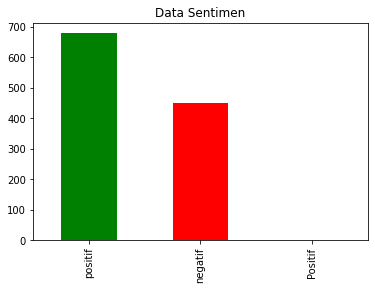

In [30]:
sentimen_data=pd.value_counts(data_sentimen["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Data Sentimen')
plt.show()

SPLIT TRAINING DAN TESTING

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.1,  random_state=30)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [33]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1016, 6722)
(113, 6722)


In [34]:
X_train = X_train.toarray()

In [35]:
X_test = X_test.toarray()

MODEL NAIVE BAYES

In [36]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [37]:
# Membangun MultinomialNB model
NB_model = MultinomialNB()

# training!
NB_model = NB_model.fit(X_train, y_train)

# predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [39]:
nb = MultinomialNB()

In [40]:
nb.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_pred_nb = nb.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,log_loss,f1_score, accuracy_score


In [43]:
#TN FN
#FP TP
print('confusion matrix')
print(confusion_matrix(y_test, y_pred_nb))
print('\n')
print('Hasil klasifikasi Naive Bayes ')
print(classification_report(y_test, y_pred_nb))


confusion matrix
[[20 27]
 [ 2 64]]


Hasil klasifikasi Naive Bayes 
              precision    recall  f1-score   support

     negatif       0.91      0.43      0.58        47
     positif       0.70      0.97      0.82        66

    accuracy                           0.74       113
   macro avg       0.81      0.70      0.70       113
weighted avg       0.79      0.74      0.72       113



Text(0.5, 1.0, 'Accuracy Score: 0.7433628318584071')

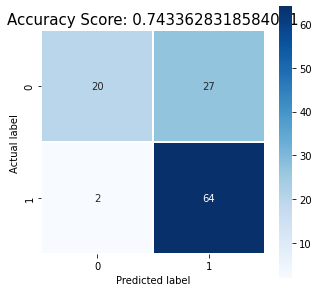

In [44]:
# let’s plot the confusion matrix as follows

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(nb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [46]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(nb,open('nb.pkl','wb'))
model = pickle.load(open('nb.pkl','rb'))

y_pred_nb = nb.predict(X_test)
print("NB Accuracy Score -> ",accuracy_score(y_pred_nb, y_test)*100)
print(y_pred_nb)

NB Accuracy Score ->  74.33628318584071
['negatif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'negatif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'negatif' 'negatif' 'positif' 'positif' 'negatif' 'positif' 'negatif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'negatif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'posit